In [2]:
import vegas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import nquad
from tqdm import tqdm
import time
from scipy.stats import unitary_group
from scipy.special import gamma
import pandas as pd

In [87]:
def Phi2(x):
    alpha, beta = x
    return np.array([[alpha, -np.conj(beta)],[beta,np.conj(alpha)]])

def inj(U,N):
    arr = np.zeros((N+1,N+1))
    arr[:N,:N] = U
    return arr

def r(N,j,k,alpha,phi):
    if k == N - 1:
        if j < N - 1:
            return np.exp(1j*alpha[j]) * np.sin(phi[j]) * np.prod(np.cos(phi)[:j-1])
        elif j == N - 1:
            return np.exp(1j*alpha[N-1]) * np.prod(np.cos(phi)[:N-1])
    elif k == N - 2:
        if j < N - 2:
            return 0
        elif j == N - 2:
            weird = np.sum(alpha[:j-1]) + np.sum(alpha[j:])
            return np.exp(-1j*weird) * np.cos(phi[N-2])
        elif j == N - 1:
            weird = np.sum(alpha[:j-1]) + np.sum(alpha[j:])
            return - np.exp(-1j*weird) * np.sin(phi[N-2])
    else:
        if j < k and k < N - 2:
            return 0
        elif j == k and k < N - 2:
            return np.exp(1j*alpha[k]) * np.cos(phi[k])
        elif k < j and j <= N - 2:
            return - np.exp(1j*alpha[j]) * np.sin(phi[k]) * np.sin(phi[j]) * np.prod(np.cos(phi)[k:j-1])
        elif k < N - 2 and j == N - 1:
            return - np.exp(1j*alpha[N-1]) * np.sin(phi[k]) * np.prod(np.cos(phi)[k:N-1])
        
def R(N,alpha,phi):
    Rn = np.zeros((N,N),dtype=complex)
    for i in range(N):
        for j in range(N):
            Rn[i,j] = r(N,j,i,alpha,phi)
    if np.linalg.det(Rn) < 0:
        Rn[:,0] = - Rn[:,0]
    return Rn

n =2

alpha = np.random.uniform(low=0,high=2*np.pi,size=n)
phi = np.random.uniform(low=0,high=np.pi/2,size=n)
#r(3,1,2,alpha,phi)

arr = R(n,alpha,phi)
#np.linalg.det(arr)
arr.dot(np.conj(arr))

array([[-0.18231351+0.02052899j, -0.03737894-0.57623133j],
       [ 0.01421833-0.21918879j, -0.18231351-0.02052899j]])

/Users/lecardin/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


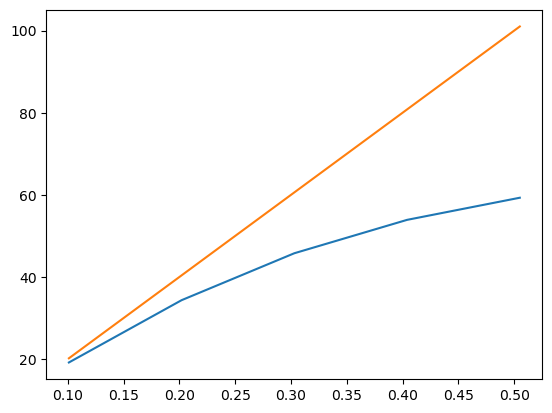

In [22]:
betas = np.linspace(0,10,100)

df = pd.read_csv('characters_U1.csv')
arr = np.array(df,dtype=complex)
plt.plot(betas[1::][:5],arr[:5])
plt.plot(betas[1::][:5],2*100*betas[1::][:5])

In [ ]:
def Phi(x,N):
    alpha = x[:N]
    phi = x[N:2*N]
    Rn = np.zeros((N,N))
    Rn[:,:] = r[:,:,alpha,phi,N]
    if np.linalg.det(Rn) < 0:
        Rn[:,0] = - Rn[:,0]
    if N == 2:
        return Phi2(Rn)
    arr = np.zeros(len(x) - 2*N)
    arr = x[2*N:]
    return Rn.dot(j(Phi(arr,N-1)))